In [ ]:
"""Program : 2 
==================================================================================================
Sales (sid, year, totalsales)

Create above table into a SQLite database with appropriate constraints. 

A. Insert at least 5-10 records into the sales table. 
B. Export sales table data into sales.csv file.
C. Write a python scripts that read the sales.csv file and plot a bar chart that shows totalsales of the year. 

Also decorate the chart with appropriate title, lables, colours etc."""

In [5]:
import csv
import sqlite3 as sq
import pandas as pd
import matplotlib.pyplot as plt

#### create table

In [2]:
conn=sq.connect("c://sqlite3//sales.db")
cur=conn.cursor()
cur.execute(" " "create table if not exists sales(sid int primary key,year int,totalsales int)""")
put="insert into sales values(?,?,?)"
record=[]

#### insert record

In [3]:
for i in range(5):
    no=int(input("Enter sales id:"))
    y=int(input("Enter year:"))
    s=int(input("Enter total sales:"))
    li=[no,y,s]
    record.append(li)
cur.executemany(put,record)

Enter sales id: 101
Enter year: 2001
Enter total sales: 2000
Enter sales id: 102
Enter year: 2002
Enter total sales: 3050
Enter sales id: 103
Enter year: 2003
Enter total sales: 2050
Enter sales id: 104
Enter year: 2004
Enter total sales: 3500
Enter sales id: 105
Enter year: 2005
Enter total sales: 5000


#### dump into csv

In [4]:
cur.execute('select * from sales ;')
r=cur.fetchall()
conn.commit()
h=['sid','year','totalsales']
with open("c:\\sqlite3\\csv\\sales.csv","w",newline='') as csvfile:
    writer=csv.writer(csvfile)
    writer.writerow(h)
    writer.writerows(r)

#### read csv

In [7]:
df=pd.read_csv("c:\\sqlite3\\csv\\sales.csv")
df

,sid,year,totalsales
0,101,2001,2000
1,102,2002,3050
2,103,2003,2050
3,104,2004,3500
4,105,2005,5000


#### plot graph

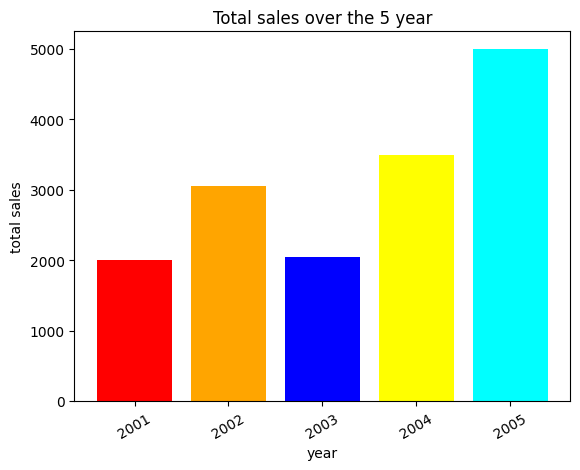

In [13]:
plt.bar(df['year'],df['totalsales'],color=['red','orange','blue','yellow','cyan'])
plt.ylabel('total sales')
plt.xlabel('year')
plt.title('Total sales over the 5 year')
plt.xticks(rotation=30)
plt.show()